# Telco Customer Churn Prediction

Churn is a large issue in the telecomms industry. The aim of this notebook is to predict customer behaviour and maximimse customer retention and prevent churning.

This IBM Sample data set has been provided at the following [link.](https://www.kaggle.com/blastchar/telco-customer-churn) This notebook follows the example by [Atindrabandi.](https://www.kaggle.com/bandiatindra/telecom-churn-prediction)



### Import libaries

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from pandas_profiling import ProfileReport

pd.set_option('display.max_columns', None)
sns.set(style = 'white')

In [231]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [63]:
telecom_df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [64]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
telecom_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [66]:
telecom_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
# convert TotalCharges from an object to a float
telecom_df.TotalCharges = pd.to_numeric(telecom_df.TotalCharges, errors='coerce')

In [69]:
# remove customer IDs from data
df = telecom_df.drop('customerID', axis=1)

# convert target variable to a binary variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

In [173]:
# convert remaining categorical variables into dummies
df = pd.get_dummies(df, drop_first=True)

df.dropna(inplace=True)

df.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [174]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


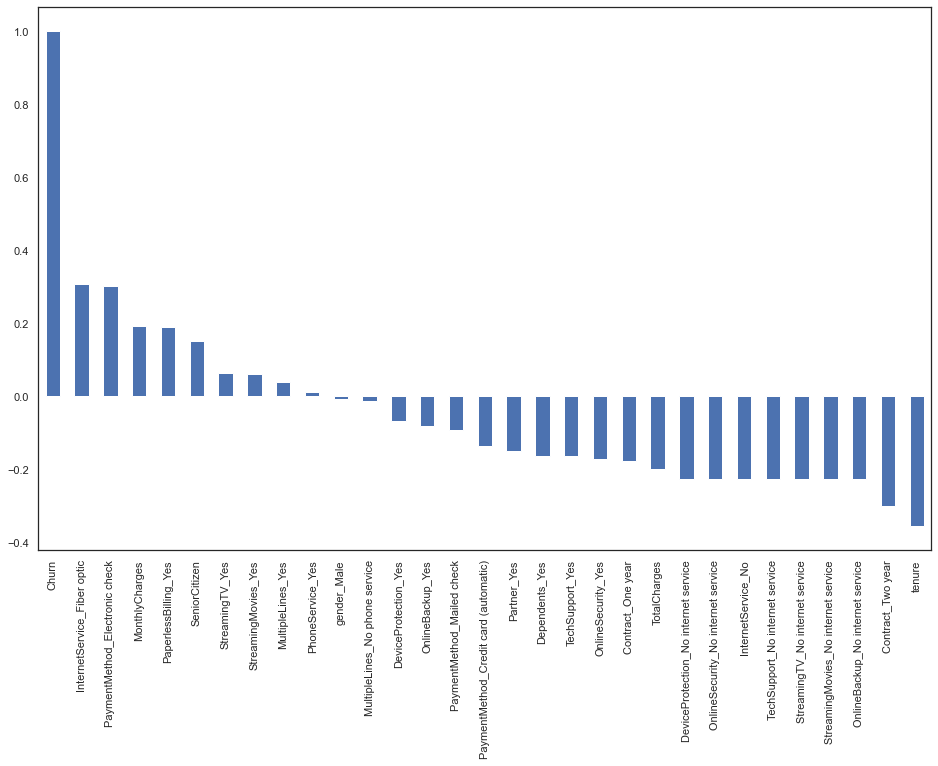

In [175]:
# visualise correlation of churn with other features:
plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

From this bar plot we can see that:
- Features positvely correlated with churn are:
    - Fiber optic internet
    - Electronic payments
    - Monthly contracts
    - Senior citizens
- Features negatively correlated with churn are:
    - Tenure
    - Two year contracts
    - No internet service

## Exploratory Data Analysis
### Understand demographic distribution

In [176]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

## Quick takeaways
1. Senior citizens make up 16% of customerbase
2. Roughly 50:50 split between male and female customers
3. 48.3% of customers have a partner
4. 30% of customers have dependents
5. 90.3% of customers have the phone service
6. 42.2% of customers have multiple lines
7. 78.3% of customers have internet service

#### Contract

In [177]:
telecom_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0.5, 1.0, 'Number of Customers by Contract Type')

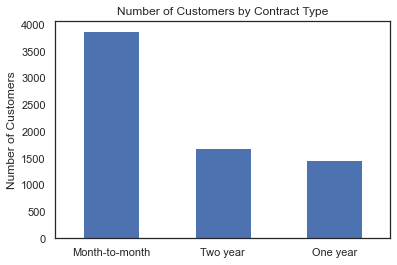

In [178]:
ax = telecom_df['Contract'].value_counts().plot(kind='bar', rot=0)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Let's look at the relationship between contract type and duration of tenure.

Text(0.5, 1.0, 'Two Year Contract')

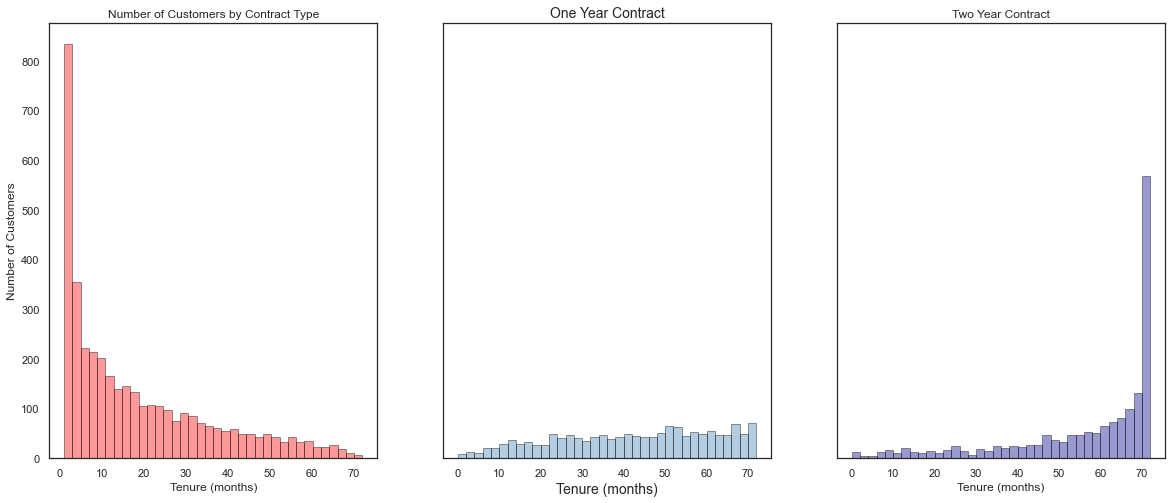

In [179]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,8))

ax = sns.distplot(telecom_df[telecom_df['Contract']=='Month-to-month']['tenure'],
                 hist=True,
                 kde=False,
                 bins=int(180 / 5),
                 color='red',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth':4},
                 ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by Contract Type')

ax = sns.distplot(telecom_df[telecom_df['Contract']=='One year']['tenure'],
                   hist=True, 
                   kde=False,
                   bins=int(180/5), 
                   color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_df[telecom_df['Contract']=='Two year']['tenure'],
                   hist=True, 
                   kde=False,
                   bins=int(180/5), 
                   color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

We can see that customers who take a longer contract tend to have longer tenure. 

#### Distribution of services

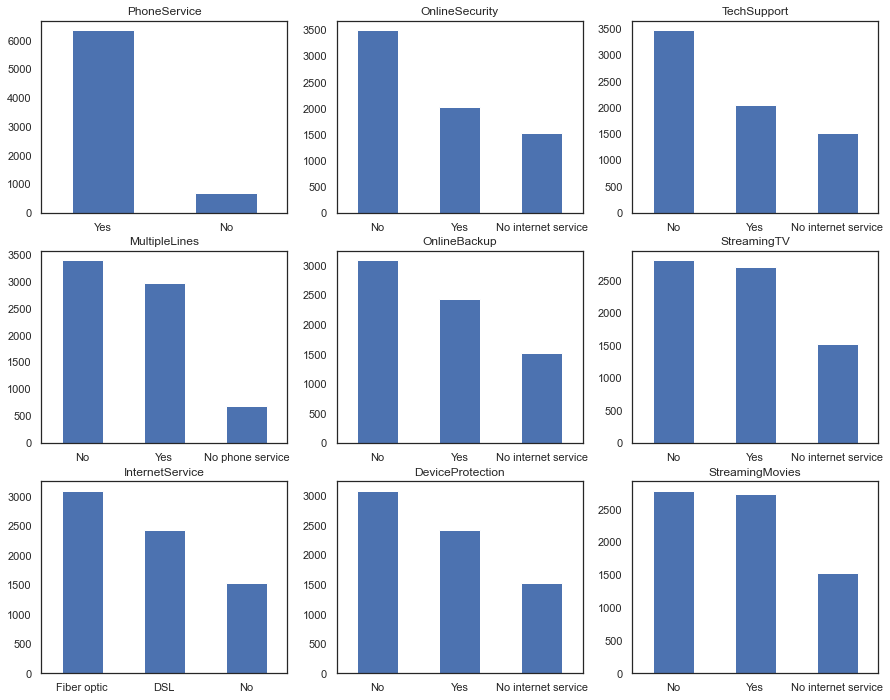

In [180]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_df[item].value_counts().plot(kind='bar', ax=axes[i,0], rot = 0)
        
    elif i >= 3 and i < 6:
        ax = telecom_df[item].value_counts().plot(kind='bar', ax=axes[i-3,1], rot = 0)
        
    elif i < 9:
        ax = telecom_df[item].value_counts().plot(kind='bar', ax=axes[i-6,2], rot = 0)
    ax.set_title(item)

#### Churn

In [181]:
telecom_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [182]:
print("Churn rate of", round(telecom_df['Churn'].value_counts()[1] / len(telecom_df) * 100,1), "%")

Churn rate of 26.5 %


Relationship between churn and tenure:

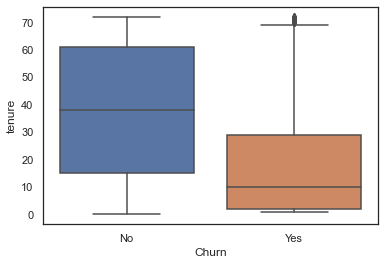

In [183]:
sns.boxplot(x=telecom_df['Churn'], y=telecom_df['tenure'])

Relationship between churn and contract type:

In [184]:
contract_churn = telecom_df.groupby(['Contract', 'Churn']).size().unstack()

In [185]:
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


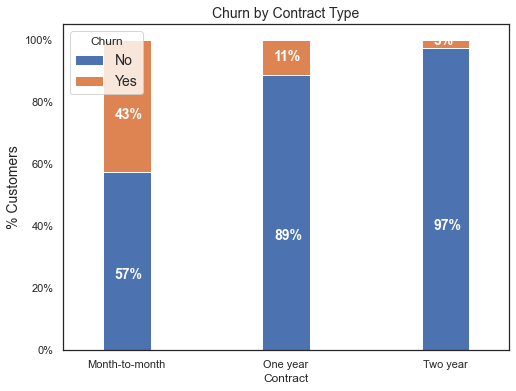

In [186]:
ax = (contract_churn.T * 100 / contract_churn.T.sum()).T.plot(
                kind='bar',
                width=0.3,
                stacked=True,
                rot=0,
                figsize=(8,6))

# add axes titles
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size':14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# add data labels to stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+0.4*height),
               color='white',
               weight='bold',
               size=14)

Churn by seniority:

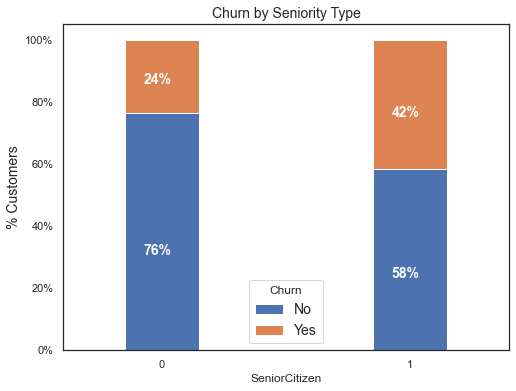

In [187]:
seniority_churn = telecom_df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

ax = (seniority_churn.T * 100 / seniority_churn.T.sum()).T.plot(
                kind='bar',
                width=0.3,
                stacked=True,
                rot=0,
                figsize=(8,6))

# add axes titles
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size':14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Seniority Type', size=14)

# add data labels to stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+0.4*height),
               color='white',
               weight='bold',
               size=14)

Churn by monthly charges:

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

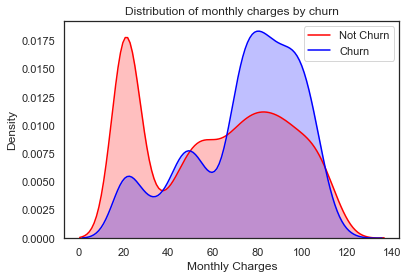

In [188]:
ax = sns.kdeplot(telecom_df['MonthlyCharges'][telecom_df['Churn'] == 'No'],
                color='Red',
                shade=True)
ax = sns.kdeplot(telecom_df['MonthlyCharges'][telecom_df['Churn'] == 'Yes'],
                color='Blue',
                shade=True)
ax.legend(['Not Churn', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

We can see that a higher proportion of customers churn with more expensive monthly charges.

## Preprocessing

In [192]:
X = df.drop(columns=['Churn'])
y = df['Churn'].values

# scale all variables to a range between 0 and 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

## Train Test Split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Model Training & Evaluation
We will train the following models:
- Logistic regression
- Random forest
- Support vector machines
- ADA Boost
- XG Boost

#### Logistic Regression

In [195]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

#### Random Forest

In [209]:
rf = RandomForestClassifier(n_estimators=800,
                            oob_score=True,
                            n_jobs=-1,
                            random_state=1,
                            max_features='auto',
                            max_leaf_nodes=30)

rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

#### Support Vector Machine

In [261]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)

#### ADA Boost

In [246]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_prediction = ab.predict(X_test)

#### XG Boost

In [254]:
xgb = XGBClassifier(learning_rate=0.01,
                    random_state=1,
                    n_jobs=-1)
xgb.fit(X_train, y_train)
xgb_prediction = xgb.predict(X_test)

## Evaluation

In [262]:
print("Logistic Regression accuracy -", round(metrics.accuracy_score(y_test, lr_prediction)*100,2), "%")
print("Random Forest accuracy -", round(metrics.accuracy_score(y_test, rf_prediction)*100,2), "%")
print("SVM accuracy -", round(metrics.accuracy_score(y_test, svm_prediction)*100,2), "%")
print("Ada Boost accuracy -", round(metrics.accuracy_score(y_test, ab_prediction)*100,2), "%")
print("XG Boost accuracy -", round(metrics.accuracy_score(y_test, xgb_prediction)*100,2), "%")

Logistic Regression accuracy - 79.95 %
Random Forest accuracy - 80.24 %
SVM accuracy - 80.05 %
Ada Boost accuracy - 80.33 %
XG Boost accuracy - 79.67 %


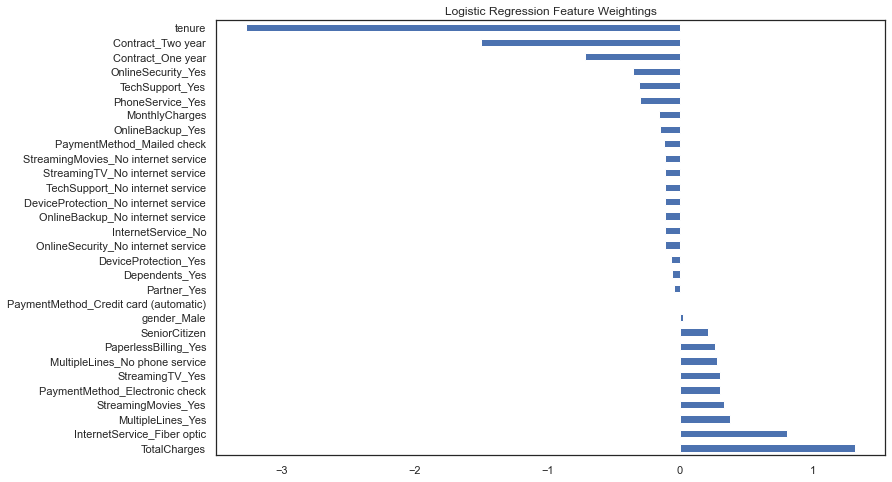

In [256]:
lr_weights = pd.Series(lr.coef_[0],
                      index=X.columns.values)
lr_weights.sort_values(ascending=False).plot(kind='barh',
                                                 title='Logistic Regression Feature Weightings',
                                                 figsize=(12,8))

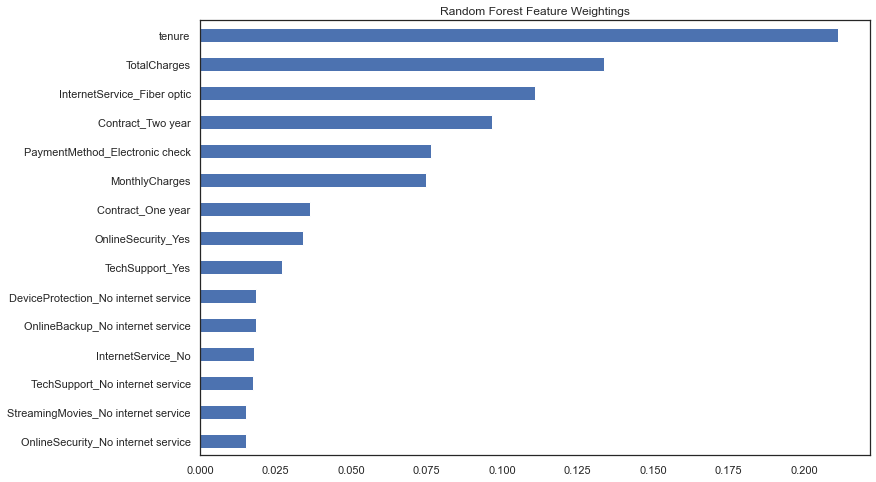

In [257]:
rf_importance = rf.feature_importances_
rf_weights = pd.Series(rf_importance,
                      index = X.columns.values)
rf_weights.sort_values()[-15:].plot(kind='barh',
                             figsize=(12,8),
                             title='Random Forest Feature Weightings')

#### Confusion Matrices

In [258]:
print("Logistic Regression Confusion Matrix: \n")
print(confusion_matrix(y_test, lr_prediction))
print("\n----------------------\n")
print("Random Forest Confusion Matrix:\n")
print(confusion_matrix(y_test, rf_prediction))
print("\n----------------------\n")
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_prediction))
print("\n----------------------\n")
print("Ada Boost Confusion Matrix:")
print(confusion_matrix(y_test, ab_prediction))
print("\n----------------------\n")
print("XG Boost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_prediction))

Logistic Regression Confusion Matrix: 

[[1382  173]
 [ 250  305]]

----------------------

Random Forest Confusion Matrix:

[[1430  125]
 [ 292  263]]

----------------------

SVM Confusion Matrix:
[[1377  178]
 [ 243  312]]

----------------------

Ada Boost Confusion Matrix:
[[1400  155]
 [ 260  295]]

----------------------

XG Boost Confusion Matrix:
[[1393  162]
 [ 267  288]]


## Conclusion
AdaBoost classifier provided the highest classifier accuracy. However, accuracy is not necessarily the best metric for comparing models, as accuracy as a metric defines a false positive error and false negative error as equals which is rarely the case in business scenarios.

For example it would be better for a telecoms company if a false positive occurred than a false negative. In this scenario, a false positive is when a customer is wrongly predicted to churn and then receive communications to prevent them from churning. Whereas a false negative would mean a customer that should have been contacted to prevent churning was not and did end up churning, whcih will end up costing the business.

Using this metric of minimising false negatives, we see that SVM is the best performing algorithm.